<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Введение хорошее.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Также можно добавить описание данных, с которыми предстоит работа, и оглавление.

</div>


## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_data_0.info()
geo_data_1.info()
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8

In [3]:
pd.DataFrame(geo_data_0.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


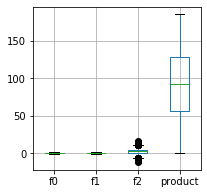

In [6]:
geo_data_0.boxplot( figsize = (3,3))

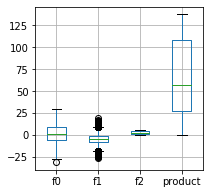

In [7]:
geo_data_1.boxplot( figsize = (3, 3))

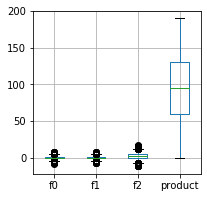

In [8]:
geo_data_2.boxplot( figsize = (3, 3))

In [9]:
print('Duplicated in 0 region:', geo_data_0.duplicated(keep = False).sum())
print('Duplicated in 1 region:', geo_data_1.duplicated(keep = False).sum())
print('Duplicated in 2 region:', geo_data_2.duplicated(keep = False).sum())

Duplicated in 0 region: 0
Duplicated in 1 region: 0
Duplicated in 2 region: 0


**Вывод 1**

- Данные импортированы и изучены
- Дубликатов нет
- В нулевом регионе наблюдаются выбросы по значениям по f2
- В первом регионе наблюдаются выбросы по значениям по f1
- Во втором регионе наблюдаются выбросы по f0, f1, f2

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b> 
    
Хорошо, данные загружены.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b> 
    
Также было бы здорово вывести head таблиц для визуального ознакомления. Также можно провести анализ, посмотреть на распределения, есть ли аномальные значения, проверить на дубликаты.

</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b> 
    
Отличное дополнение!

</div>

## Обучение и проверка модели

In [10]:
def modeling(data):
    
    features = data.drop(['product', 'id'], axis = 1)
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345) 
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predict = model.predict(features_valid)
    mse = mean_squared_error(target_valid, predict)
    rmse = mse**0.5
    r2 = r2_score(target_valid, predict)
    mean = data['product'].mean()
    mean_predict = predict.mean()
    
    #cross validation
    model = LinearRegression()
    scores = cross_val_score(model, features, target, cv = 5)
    final_score = scores.sum() / len(scores)

    print(' cross valid ', final_score.round(4))

    print(' MSE         ', mse.round(3), '\n', 
          'RMSE        ',rmse.round(3), '\n', 
          'R2          ', r2.round(3), '\n', 
          'Mean        ', mean.round(2),'\n',
          'Mean predict', mean_predict.round(2))
    print()
    return predict, target_valid

In [11]:
predict_0, target_valid_0 = modeling(geo_data_0)
predict_1, target_valid_1  = modeling(geo_data_1)
predict_2, target_valid_2 = modeling(geo_data_2)

 cross valid  0.2755
 MSE          1412.213 
 RMSE         37.579 
 R2           0.28 
 Mean         92.5 
 Mean predict 92.59

 cross valid  0.9996
 MSE          0.798 
 RMSE         0.893 
 R2           1.0 
 Mean         68.83 
 Mean predict 68.73

 cross valid  0.1987
 MSE          1602.378 
 RMSE         40.03 
 R2           0.205 
 Mean         95.0 
 Mean predict 94.97



Text(0.5, 1.0, 'Распределение скважин в зависимости от объема запасов')

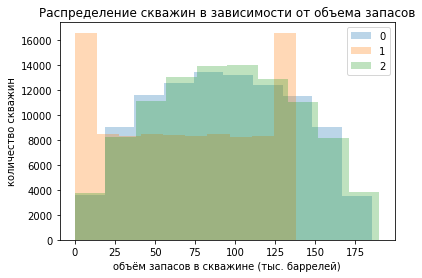

In [12]:
plt.hist(geo_data_0['product'], alpha = 0.3)
plt.hist(geo_data_1['product'], alpha = 0.3)
plt.hist(geo_data_2['product'], alpha = 0.3)
plt.legend(['0','1','2'])
plt.ylabel('количество скважин')
plt.xlabel('объём запасов в скважине (тыс. баррелей)')
plt.title('Распределение скважин в зависимости от объема запасов')

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b> 
    
Здорово, что визуализируешь результаты.

</div>

**Вывод 2**

- Создана функция, в которой:
   - данные делятся на обучающуюся и валидационную выборку
   - обучается модель линейной регрессии
   - модель оценивается с помощью кросс валидации
- Наиболее качественные показатели (cross valid, R2, RMSE) у первого региона (geo_data_1),  хотя в 0 и во 2 регионах добывают в среднем больше баррелей
- По гистограмме распределения скважин видно, что в первом регионе есть большое количество скважин с минимальным запасом, но в том же время присутствует большое количество скважин и с большими запасами
- Объем запасов в 0 и во 2 регионе распределены нормально

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Модели обучены корректно. Результаты также верны.

</div>

## Подготовка к расчёту прибыли

In [13]:
PLACE = 500
BEST_PLACE = 200
BUDGET = 10_000_000_000
BARREL = 450
barrel1000 = 450000

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Имена констант среди программистов принято писать заглавными буквами. Также можно использовать `_` как разделитель для длинных чисел:
    
>`BUDGET = 10_000_000_000`

</div>



<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b> 
    

👍
</div>

In [14]:
V = int(BUDGET/BEST_PLACE/ barrel1000)
print(V, 'баррелей')

111 баррелей


**Вывод 3**

- Достаточный объем для безубыточной разработки новой скважины = 111 баррелям
- Этот показатель выше, чем средний запас в каждом регионе, но для расчета безубыточной разработки были взяты 200 лучших скважин

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Порог, при котором разработка будет безубыточной, определен верно.

</div>


## Расчёт прибыли и рисков 

In [15]:
def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False) 
    selected = target[probs_sorted.index][:count] 
    
    return  barrel1000* selected.sum() - BUDGET

state = np.random.RandomState(12345)

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Пожалуйста, обрати внимание, что нам нужно рассчитать прибыль, а не выручку (то есть еще нужно вычесть бюджет).

</div>


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b> 
    
Теперь все корректно!

</div>

In [16]:
def profitandrisk(target, probabilities):
    
    values = []
    
    #bootstrap
    for i in range(1000):
        target.reset_index(drop = True, inplace = True)
        target_subsample = target.sample(500,  replace = True,
                                         random_state = state)
        probabilities = pd.Series(probabilities)

        probs_subsample = probabilities[target_subsample.index] 
        values.append(revenue(target_subsample,probs_subsample,200))
    values = pd.Series(values)
    
    #histogram
    plt.hist(values, bins = 50,  color = "orange", alpha = 0.3)
    plt.xticks(rotation=45)
    plt.xlabel('Прибыль')
    plt.title("Распределение прибыли")
    
    plt.axvline(0, color="green", linestyle="dotted", lw = 1.5)
    plt.axvline(values.quantile(0.025), color="red", linestyle="dotted", lw = 1.5)
    plt.axvline(values.quantile(0.975), color="red", linestyle="dotted", lw = 1.5)
    plt.axvline(values.mean(), color="red", linestyle="-", lw = 0.4)
    
    high = values.quantile(0.975)
    lower = values.quantile(0.025)
    mean = values.mean()
    
    #confidence interval
#     confidence_interval = st.t.interval(0.95, 
#                                         len(values) - 1, 
#                                         values.mean(), 
#                                         values.sem())
    
    risk = values[values<0].count()/1000
 
    print(' средняя прибыль        ', '{0:,}'.format(mean.round()).replace(',', ' '),'\n', 
         'нижняя граница 2.5%    ','{0:,}'.format(lower.round()).replace(',', ' '), '\n',
         'верхняя граница 97.5%  ','{0:,}'.format(high.round()).replace(',', ' '), '\n' , 
         'риск                   ',  risk*100)

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Также обрати внимание, что в данном случае не совсем корректно находить 95% доверительный интервал с помощью метода stats.t.interval, так как он ориентируется на среднюю прибыль и другие характеристики и моделирует распределение Стьюдента по ним. У нас же есть фактические данные. Поэтому правильно будет найти 95% дов. интервал с помощью квантилей - 0,025 и 0,975.

</div>


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b> 
    
👍

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Также для расчета рисков можно использовать такой метод `stats.percentileofscore(values, 0)`, достаточно удобно.

</div>


 средняя прибыль         425 938 527.0 
 нижняя граница 2.5%     -102 090 095.0 
 верхняя граница 97.5%   947 976 353.0 
 риск                    6.0


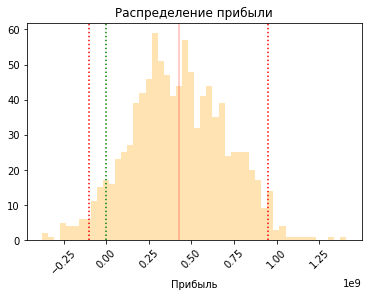

In [17]:
profitandrisk(target_valid_0, predict_0)

 средняя прибыль         518 259 494.0 
 нижняя граница 2.5%     128 123 231.0 
 верхняя граница 97.5%   953 612 982.0 
 риск                    0.3


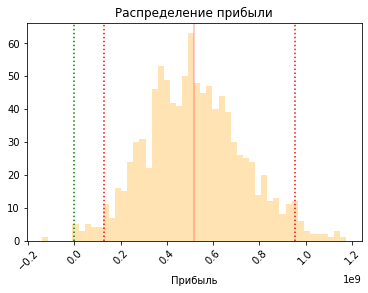

In [18]:
profitandrisk(target_valid_1, predict_1)

 средняя прибыль         420 194 005.0 
 нижняя граница 2.5%     -115 852 609.0 
 верхняя граница 97.5%   989 629 940.0 
 риск                    6.2


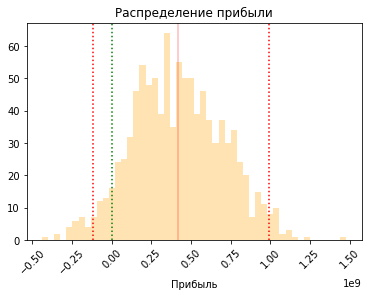

In [19]:
profitandrisk(target_valid_2, predict_2)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b> 
    
Бутстрап проведен корректно! Риски тоже найдены верно. Здорово, что вывела результаты в виде картинок.

</div>

**Вывод 4**

- Создана функция, в которой:
   - считается прибыль

- Создана функция, в которой:
   - использован bootstrap, confidence interval
   - подсчитывается средняя прибыль, нижняя граница, верхняя граница, риск
   - строится гистограмма распределения прибыли
   - линии в гистограмме: красные - нижняя и верхняя границы, средняя прибыль; зеленая - 0

- Наиболее подходящим для разработки является первый регион, так как там ниже риск (менее 1%) получить убыток, нижняя граница прибыли (в 2.5%) проходит на 128 123 231 рублей.  

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

С выбором региона согласен. Хороший, цельный проект с понятным кодом и грамотными выводами, молодец.

</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован

<div class="alert alert-info"> <b>Комментарий студента:</b> добавила оглавление, вывела данные, посмотрела на выбросы и есть ли дубликаты; большими буквами написала константы; посчитала именно прибыль, убрала вычисление доверительного интервала через st.t.interval</div>